<a href="https://colab.research.google.com/github/minj0207/class_ai4dl/blob/main/Midterm_ai4dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on AI for Deep Learning

- Name:  장민정
- ID Number:  20216173

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :) 


In [ ]:
import tensorflow as tf
tf.keras.__version__

'2.8.0'

## Q1 We will use mnist data for Q1


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
x_train, x_test = x_train / 255.0, x_test / 255.0

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

11490434/11490434 [==============================] - 2s 0us/step


#### (Q1-1) [15 points] Design your neural network model with the structure below

- We have three Dense layers. Follow the description below.
  - [10] Setup output sizes as 512, 100 and 10 for all three Dense layers.
  - [5] Setup appropriate activation layers such as relu, sigmoid, and softmax.

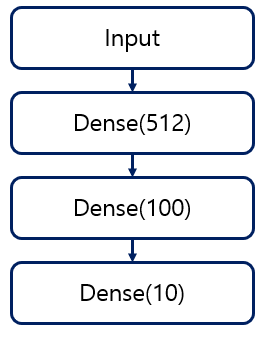

In [3]:
from tensorflow.keras import layers, models
from tensorflow import keras
## Define your model here
model =  keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(100, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

#### (Q1-2) [10 points] Compile your model.  
 - Setup optimizer as 'RMSprop optimizer.'
 - Use categorical cross entropy loss.
 - Set your evaluation metric as 'accuracy.'

In [4]:

### Define optimizer, loss, and metrics here

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


#### (Q1-3) [5 points] Seperate validation data from your training data. Set the number of validation data as 10000. Complete the code below.

In [8]:
import numpy as np 

indices_permutation = np.random.permutation(60000)
shuffled_x_train = x_train[indices_permutation]
shuffled_train_labels = train_labels[indices_permutation]

num_validation_samples = 20000

## Complete the code below: 
val_x =   shuffled_x_train[:num_validation_samples]
val_labels = shuffled_train_labels[:num_validation_samples]


trn_x = shuffled_x_train[num_validation_samples:]
trn_labels = shuffled_train_labels[num_validation_samples:]

#### (Q1-4) [10 points] Fit your model. 
- Use epoch size of 10, and batch size of 100.
- Use trn_x and trn_labels as training data
- Use val_x and val_labels as validation data 

In [29]:
### Define how you fit your model
## Specify training data, validation data, epoch and batch size

history = model.fit(trn_x, trn_targets, validation_data=(val_x, val_targets), epochs=10, batch_size=100)

Epoch 1/10
4/4 [==============================] - 3s 66ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 8/10
4/4 [==============================] - 0s 12

In [30]:
import matplotlib.pyplot as plt
val_loss = history.history["val_accuracy"]
trn_loss = history.history["accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation Accuracy")
plt.plot(epochs, trn_loss, "r-",
         label="Training Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

KeyError: ignored

#### (Q1-5) [5 points] Code below listing five written digits from the test data. Use our trained model to test those images. (Hint: use model.predict )

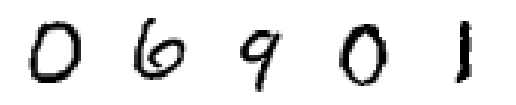

In [11]:
tst_imgs = x_test[10:15,].reshape(5, 28,28)

import matplotlib.pyplot as plt

for i in range(5):
  ax = plt.subplot(1, 5, i + 1)
  plt.imshow(tst_imgs[i] , cmap=plt.cm.binary)
  plt.axis("off")


1/1 [==============================] - 4s 4s/step


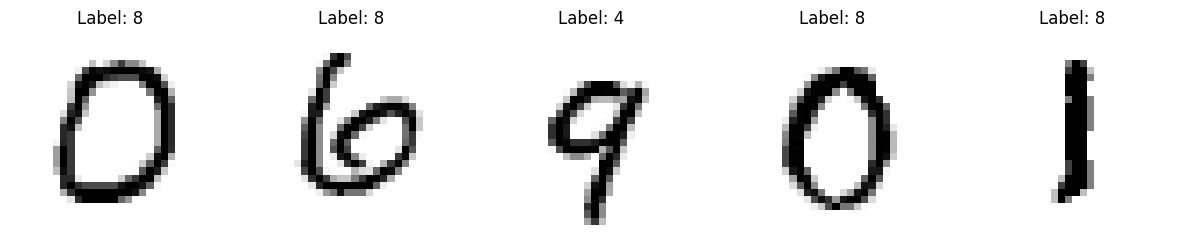

In [19]:
## Define your prediction code here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



# Select five handwritten digits from the test data
tst_imgs = x_test[10:15,].reshape(5, 784)

# Predict the labels of the five images using the model
predictions = model.predict(tst_imgs)

# Display the five images and their predicted labels
plt.figure(figsize=(15, 3))
for i in range(5):
  ax = plt.subplot(1, 5, i + 1)
  plt.imshow(tst_imgs[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.title(f'Label: {np.argmax(predictions[i])}')
  plt.axis("off")
plt.show()

## Q2 We will use the Boston housing data for Q2

In [20]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [21]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [22]:
train_data.shape

(404, 13)

#### (Q2-1) [5 points] Seperate validation data from your training data. Set the number of validation data as 54. Complete the code below.

In [25]:
import numpy as np 

indices_permutation = np.random.permutation(404)
shuffled_x_train = train_data[indices_permutation]
shuffled_train_targets = train_targets[indices_permutation]

num_validation_samples = 54

## Complete the code below: 
val_x = shuffled_x_train[:num_validation_samples]
val_targets = shuffled_train_targets[:num_validation_samples]


trn_x = shuffled_x_train[num_validation_samples:]
trn_targets = shuffled_train_targets[num_validation_samples:]


#### (Q2-2) [10 points] Design your neural network model with the structure below

- We have three Dense layers. Follow the description below.
  - Setup output sizes as 300, 200 and 1 for all three Dense layers.
  - Setup appropriate activation layers (such as relu, sigmoid, softmax and None).

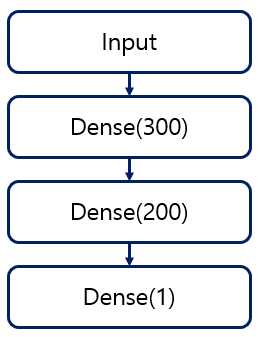

This time we will make a function (build_model) to define our model.

In [27]:
def build_model():
    model = keras.Sequential([
    layers.Dense(300, activation="relu"),
    layers.Dense(300, activation="sigmoid"),
    layers.Dense(1, activation="softmax")
])
## Define your layers here     


    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [28]:
model = build_model()

#### (Q2-2) [10 points] Fit your model. 
- Use epoch size of 200, and batch size of 30.
- Use trn_x and trn_targets as training data
- Use val_x and val_targets as validation data 

In [31]:
history = model.fit(trn_x, trn_targets, validation_data=(val_x, val_targets), epochs=200, batch_size=30)

Epoch 1/200
12/12 [==============================] - 0s 10ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 552.3773 - mae: 21.5574 - val_loss: 477.5109 - val_mae: 20.3426
Epoch 8/200
12/12 [=====================

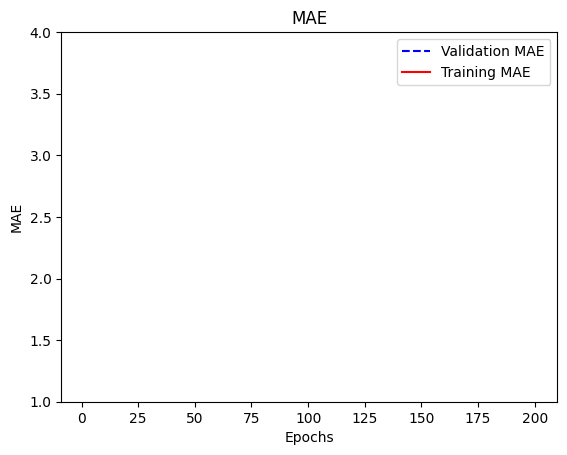

In [32]:
import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 201)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,4])
plt.legend()

#### (Q2-3) [5 points] Evaluate your model on test data. 
- Report the MAE and MSE score on test data 

In [ ]:
## use model.evaluate to get MAE and MSE scores.

# 챗에 쳐본 결과
# Assuming your model has been defined and trained, you can evaluate it on the test data as follows:

# Evaluate the model on the test data
test_loss, test_mae, test_mse = model.evaluate(test_data, test_targets)

# Print the MAE and MSE scores on the test data
print(f'Test MAE: {test_mae:.2f}')
print(f'Test MSE: {test_mse:.2f}')

4/4 [==============================] - 0s 5ms/step - loss: 14.8011 - mae: 2.6264


#### (Q2-4) [10 points] Revise the model using dropout regularization with the structure below
- Add two dropout layers with rate 0.2. 

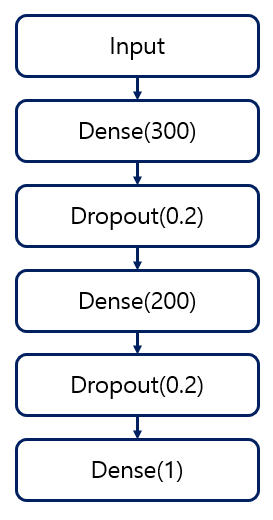

In [ ]:
def build_model_dropout():
    model = keras.Sequential([
## Define your model here     

    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
model_dr = build_model_dropout()

In [ ]:
#챗에 쳐본 결과
from tensorflow.keras import models
from tensorflow.keras import layers

# Define the model architecture
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


#### (Q2-5) [5 points] Fit your model. 
- Use epoch size of 200, and batch size of 30.
- Use trn_x and trn_targets as training data
- Use val_x and val_targets as validation data 

In [ ]:
history_dr = model_dr.fit(
    ## Specify training data, validation data, epoch and batch size

)

#### (Q2-6) [5 points] Modify the code below and Visualize the history of "val_mae" and "mae" for our new dropout model (model_dr).  

The result maybe look like below.  
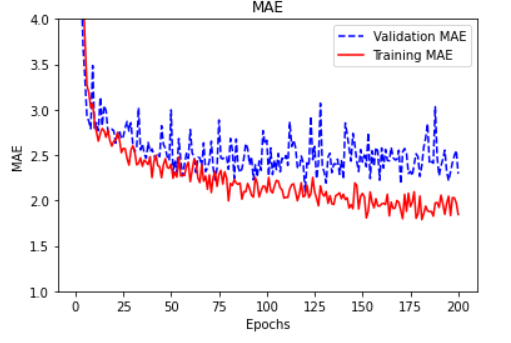

In [ ]:
## Modify the code below to visualize the his

import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 201)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,4])
plt.legend()

#### (Q2-7) [5 points] Evaluate your model on test data. 
- Report the MAE and MSE score on test data 

In [ ]:
## use model.evaluate to get MAE and MSE scores.

4/4 [==============================] - 0s 4ms/step - loss: 14.7977 - mae: 2.5753


In [ ]:
#챗에 쳐본 결과
# Assuming your modified model has been defined and trained, you can evaluate it on the test data as follows:

# Evaluate the model on the test data
test_loss, test_mae, test_mse = model.evaluate(test_data, test_targets)

# Print the MAE and MSE scores on the test data
print(f'Test MAE: {test_mae:.2f}')
print(f'Test MSE: {test_mse:.2f}')